# Eredivisie Data Research #

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch


## Loading the data ##

In [3]:
uncleaned_data = pd.read_csv('C:/Users/Rodolfo Amorim/Desktop/Football_Research/Football-Research/Matches.csv')

C:\Users\Rodolfo Amorim\AppData\Local\Temp\ipykernel_21048\1179026820.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  uncleaned_data = pd.read_csv('C:/Users/Rodolfo Amorim/Desktop/Football_Research/Football-Research/Matches.csv')


In [4]:
uncleaned_data.head()

,Division,MatchDate,MatchTime,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,...,MaxUnder25,HandiSize,HandiHome,HandiAway,C_LTH,C_LTA,C_VHD,C_VAD,C_HTB,C_PHB
0,F1,2000-07-28,NaN,Marseille,Troyes,1686.34,1586.57,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F1,2000-07-28,NaN,Paris SG,Strasbourg,1714.89,1642.51,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F2,2000-07-28,NaN,Wasquehal,Nancy,1465.08,1633.80,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F1,2000-07-29,NaN,Auxerre,Sedan,1635.58,1624.22,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F1,2000-07-29,NaN,Bordeaux,Metz,1734.34,1673.11,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Primeira Liga Dataframe 
eredivisie_dataframe = uncleaned_data[uncleaned_data['Division'] == 'N1']
eredivisie_dataframe 

,Division,MatchDate,MatchTime,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,...,MaxUnder25,HandiSize,HandiHome,HandiAway,C_LTH,C_LTA,C_VHD,C_VAD,C_HTB,C_PHB
122,N1,2000-08-18,NaN,Sparta,Roda JC,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,N1,2000-08-19,NaN,Graafschap,PSV Eindhoven,1424.63,1742.15,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,N1,2000-08-19,NaN,Feyenoord,AZ Alkmaar,1661.08,1507.67,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,N1,2000-08-19,NaN,NAC Breda,Waalwijk,1380.35,1407.50,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,N1,2000-08-20,NaN,Groningen,Willem II,1380.35,1503.96,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230422,N1,2025-05-18,13:30:00,Heracles,Nijmegen,1416.63,1502.63,3.0,6.0,7.0,...,2.55,0.0,1.88,1.93,0.0223,0.1483,0.0259,0.0881,0.7003,0.0151
230423,N1,2025-05-18,13:30:00,NAC Breda,Willem II,1353.71,1321.88,0.0,2.0,1.0,...,2.08,-0.5,1.85,1.95,0.0469,0.2688,0.0966,0.0365,0.5360,0.0153
230424,N1,2025-05-18,13:30:00,Sparta Rotterdam,PSV Eindhoven,1497.50,1793.04,4.0,8.0,9.0,...,4.50,1.8,1.95,1.85,0.0140,0.0098,0.0098,0.9242,0.0323,0.0098
230425,N1,2025-05-18,13:30:00,Waalwijk,Go Ahead Eagles,1363.69,1513.18,3.0,3.0,4.0,...,3.15,0.3,1.85,1.95,0.0316,0.0119,0.0190,0.1701,0.7543,0.0131


#### Selecting the 2025 data

In [125]:
#Basically we iterate over all the values of the dataframe and find all the matches that occured in 2025
#One option: If we wanted to select by years, say between 2020 and 2025, just use the list in the .isin() function in ['2020','2021','2022','2023','2024']

#Selecting the games for the Eredivisie 2024-2025 season 
start_date = pd.to_datetime('2024-08-01')
end_date = pd.to_datetime('2025-05-31')

eredivisie_2025_dataframe = eredivisie_dataframe[
    (pd.to_datetime(eredivisie_dataframe.iloc[:, 1]) >= start_date) & (pd.to_datetime(eredivisie_dataframe.iloc[:, 1]) <= end_date)
] 

In [126]:
eredivisie_2025_dataframe

,Division,MatchDate,MatchTime,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,...,MaxUnder25,HandiSize,HandiHome,HandiAway,C_LTH,C_LTA,C_VHD,C_VAD,C_HTB,C_PHB
222349,N1,2024-08-09,19:00:00,Groningen,NAC Breda,1326.88,1326.88,0.0,1.0,1.0,...,2.38,-1.0,2.06,1.84,0.0100,0.0343,0.9165,0.0099,0.0144,0.0150
222410,N1,2024-08-10,15:30:00,Feyenoord,Willem II,1762.33,1326.88,9.0,15.0,7.0,...,3.17,-2.3,1.88,2.02,0.0698,0.1688,0.0171,0.4371,0.2967,0.0104
222426,N1,2024-08-10,17:45:00,Nijmegen,Twente,1506.72,1625.69,6.0,7.0,6.0,...,2.27,0.5,1.89,2.01,0.0773,0.1981,0.0099,0.6699,0.0156,0.0291
222428,N1,2024-08-10,19:00:00,Almere City,AZ Alkmaar,1376.83,1589.65,1.0,1.0,7.0,...,2.22,1.0,1.85,2.05,0.0162,0.0098,0.9328,0.0098,0.0215,0.0098
222433,N1,2024-08-10,20:00:00,PSV Eindhoven,Waalwijk,1792.65,1387.43,7.0,13.0,4.0,...,3.95,-2.5,1.82,2.08,0.2681,0.3706,0.1530,0.0199,0.0709,0.1174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230422,N1,2025-05-18,13:30:00,Heracles,Nijmegen,1416.63,1502.63,3.0,6.0,7.0,...,2.55,0.0,1.88,1.93,0.0223,0.1483,0.0259,0.0881,0.7003,0.0151
230423,N1,2025-05-18,13:30:00,NAC Breda,Willem II,1353.71,1321.88,0.0,2.0,1.0,...,2.08,-0.5,1.85,1.95,0.0469,0.2688,0.0966,0.0365,0.5360,0.0153
230424,N1,2025-05-18,13:30:00,Sparta Rotterdam,PSV Eindhoven,1497.50,1793.04,4.0,8.0,9.0,...,4.50,1.8,1.95,1.85,0.0140,0.0098,0.0098,0.9242,0.0323,0.0098
230425,N1,2025-05-18,13:30:00,Waalwijk,Go Ahead Eagles,1363.69,1513.18,3.0,3.0,4.0,...,3.15,0.3,1.85,1.95,0.0316,0.0119,0.0190,0.1701,0.7543,0.0131


In [127]:
## Dropping some variables
eredivisie_2025_dataframe = eredivisie_2025_dataframe.drop(columns=['Division'])

# Extracting Insights 


## Relation between Half-time results and Full-time results

In [128]:
ft_hf_results_eredivisie_2005 =  eredivisie_2025_dataframe[['FTResult','HTResult']]

# Check if there are any NaN values 
ft_hf_results_eredivisie_2005.isnull().values.any()

np.False_

In [129]:
#Doing cross-tabulation on the previous two variables data
ct_ft_hf_2025 = pd.crosstab(ft_hf_results_eredivisie_2005['HTResult'], ft_hf_results_eredivisie_2005['FTResult'])
ct_ft_hf_2025

FTResult,A,D,H
HTResult,,,
A,51,18,6
D,31,42,45
H,8,17,88


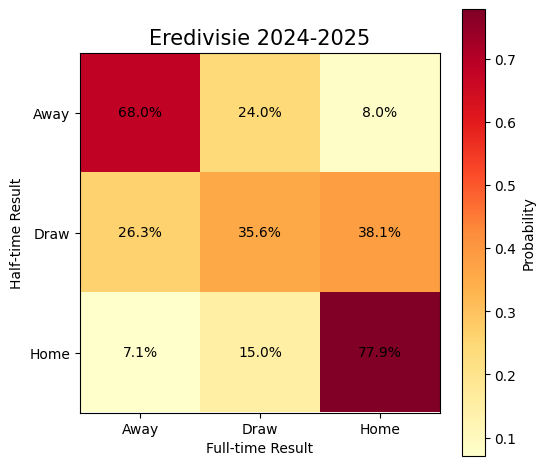

In [130]:
#Heatmap for the HF to FT transition 

#Creating the canvas for the plot 
fig, ax = plt.subplots(figsize=(5.8, 5.8))

#Finding the probability of the different transitions 
ct_ft_hf_2025_normalized = pd.crosstab(ft_hf_results_eredivisie_2005['HTResult'], ft_hf_results_eredivisie_2005['FTResult'],normalize='index')

#Making the heatmap
im = ax.imshow(ct_ft_hf_2025_normalized,cmap = 'YlOrRd') #cmap='YlOrBr'

    #Setting the axes
ax.set_xticks(range(len(ct_ft_hf_2025_normalized.columns)))
ax.set_xticklabels(['Away','Draw','Home'])
ax.set_yticks(range(len(ct_ft_hf_2025_normalized.columns)))
ax.set_yticklabels(['Away','Draw','Home'])

    #Labelling the different axes
ax.set_xlabel('Full‑time Result')
ax.set_ylabel('Half‑time Result')
fig.colorbar(im, location = 'right', label='Probability')
plt.title('Eredivisie 2024-2025',fontsize = 15)

for i in range(len(ct_ft_hf_2025_normalized.columns)):
    for j in range(len(ct_ft_hf_2025_normalized.columns)):
            text = ax.text(j, i, str(np.round(ct_ft_hf_2025_normalized.iloc[i, j]*100,1))+'%',
                         ha="center", va="center", color='black')
 

We can see that if a team is winning at half-time it most likely (>70% probability) **wins** the game, with this influence being heavier on the home team side.
If Half-time ends in a draw, it tends to end up either as a **draw** or the home team **winning**. 


## Shot efficiency and its relevancy

In [131]:
eredivisie_2025_shot_efficiency_dataframe = eredivisie_2025_dataframe[['HomeTeam','AwayTeam','FTResult','FTHome','FTAway','HomeShots','AwayShots','HomeTarget','AwayTarget']]
eredivisie_2025_shot_efficiency_dataframe = eredivisie_2025_shot_efficiency_dataframe.reset_index(drop=True)


In [132]:
#Creating dictionaries for all the teams in Eredivisie
total_team_dictionary = {}
home_team_dictionary = {}
away_team_dictionary = {}
for item in eredivisie_2025_shot_efficiency_dataframe['HomeTeam'].unique():
    total_team_dictionary[item] = []
    home_team_dictionary[item] = []
    away_team_dictionary[item] = []

### Efficiency (Goal/Shots at target)

In [133]:
for i in range(len(eredivisie_2025_shot_efficiency_dataframe)):
   
    efficiency_home = eredivisie_2025_shot_efficiency_dataframe.iloc[i,3]/eredivisie_2025_shot_efficiency_dataframe.iloc[i,7]
    efficiency_away = eredivisie_2025_shot_efficiency_dataframe.iloc[i,4]/eredivisie_2025_shot_efficiency_dataframe.iloc[i,8]

    if not(np.isnan(efficiency_home)):
        home_team_dictionary[eredivisie_2025_shot_efficiency_dataframe.iloc[i,0]].append(efficiency_home)

    if not(np.isnan(efficiency_away)):
        away_team_dictionary[eredivisie_2025_shot_efficiency_dataframe.iloc[i,1]].append(efficiency_away)

C:\Users\Rodolfo Amorim\AppData\Local\Temp\ipykernel_21048\3563010779.py:3: RuntimeWarning: invalid value encountered in scalar divide
  efficiency_home = eredivisie_2025_shot_efficiency_dataframe.iloc[i,3]/eredivisie_2025_shot_efficiency_dataframe.iloc[i,7]
C:\Users\Rodolfo Amorim\AppData\Local\Temp\ipykernel_21048\3563010779.py:4: RuntimeWarning: invalid value encountered in scalar divide
  efficiency_away = eredivisie_2025_shot_efficiency_dataframe.iloc[i,4]/eredivisie_2025_shot_efficiency_dataframe.iloc[i,8]


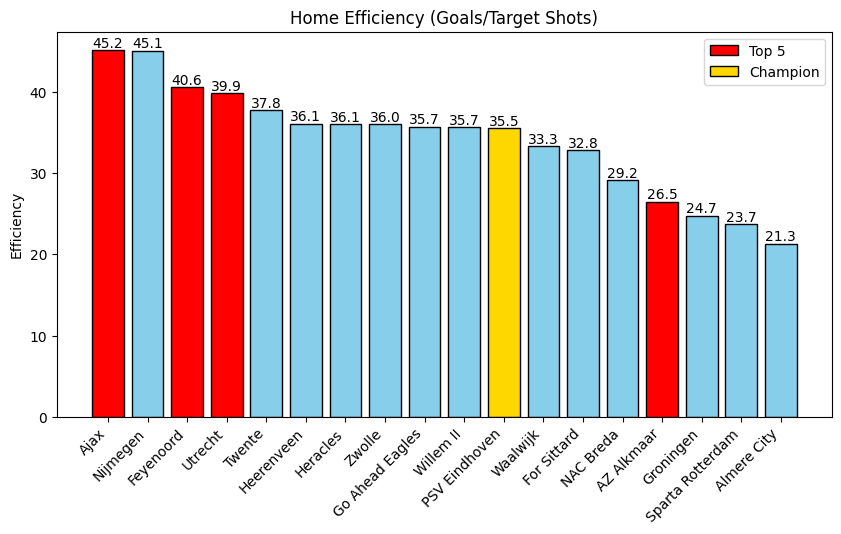

In [149]:
###Home Efficiency 

home_efficiency_list = []
for item in home_team_dictionary:
    home_efficiency_list.append({"Team": item, "Efficiency": np.mean(home_team_dictionary[item])})

    
home_efficiency_dataframe = pd.DataFrame(home_efficiency_list)
sorted_df = home_efficiency_dataframe.sort_values(by='Efficiency', ascending=False)
fig, ax = plt.subplots(figsize=(10, 5))

#Setting up the colors
colors = ['red','skyblue','red','red','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','gold','skyblue','skyblue','skyblue','red','skyblue','skyblue','skyblue']


bar_container = ax.bar(sorted_df['Team'], sorted_df['Efficiency']*100, color=colors,edgecolor='black')
ax.set(ylabel='Efficiency', title='Home Efficiency (Goals/Target Shots)')
ax.bar_label(bar_container, fmt='{:,.1f}')
ax.set_xticks(range(len(sorted_df['Team'])),labels=sorted_df['Team'],rotation=45, ha='right')
#ax.grid(True)

legend_elements = [
    Patch(facecolor='red', edgecolor='black', label='Top 5'),
    Patch(facecolor='gold', edgecolor='black', label='Champion')
]

ax.legend(handles=legend_elements)

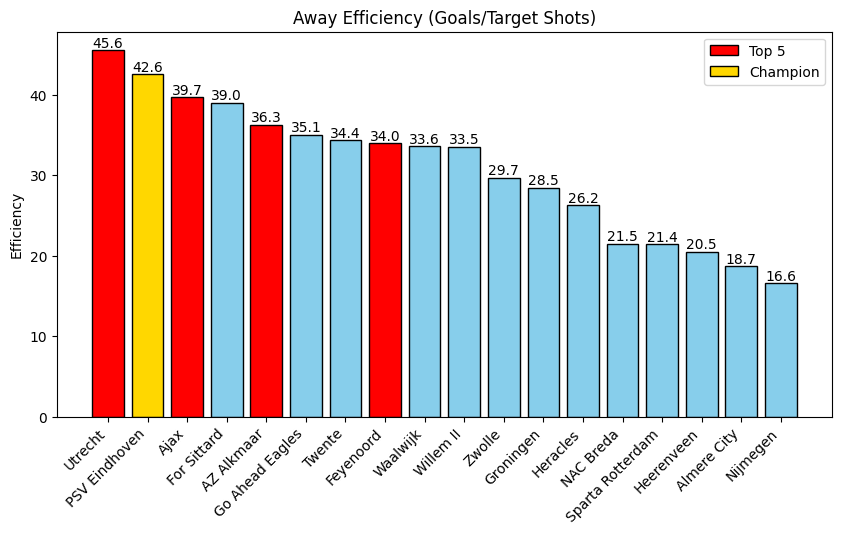

In [151]:
###Away Efficiency 

away_efficiency_list = []
for item in away_team_dictionary:
    away_efficiency_list.append({"Team": item, "Efficiency": np.mean(away_team_dictionary[item])})

    
away_efficiency_dataframe = pd.DataFrame(away_efficiency_list)
sorted_df = away_efficiency_dataframe.sort_values(by='Efficiency', ascending=False)
fig, ax = plt.subplots(figsize=(10, 5))

#Setting up the colors
colors = ['red','gold','red','skyblue','red','skyblue','skyblue','red','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue']


bar_container = ax.bar(sorted_df['Team'], sorted_df['Efficiency']*100, color=colors,edgecolor='black')
ax.set(ylabel='Efficiency', title='Away Efficiency (Goals/Target Shots)')
ax.bar_label(bar_container, fmt='{:,.1f}')
ax.set_xticks(range(len(sorted_df['Team'])),labels=sorted_df['Team'],rotation=45, ha='right')
#ax.grid(True)

legend_elements = [
    Patch(facecolor='red', edgecolor='black', label='Top 5'),
    Patch(facecolor='gold', edgecolor='black', label='Champion')
]

ax.legend(handles=legend_elements)

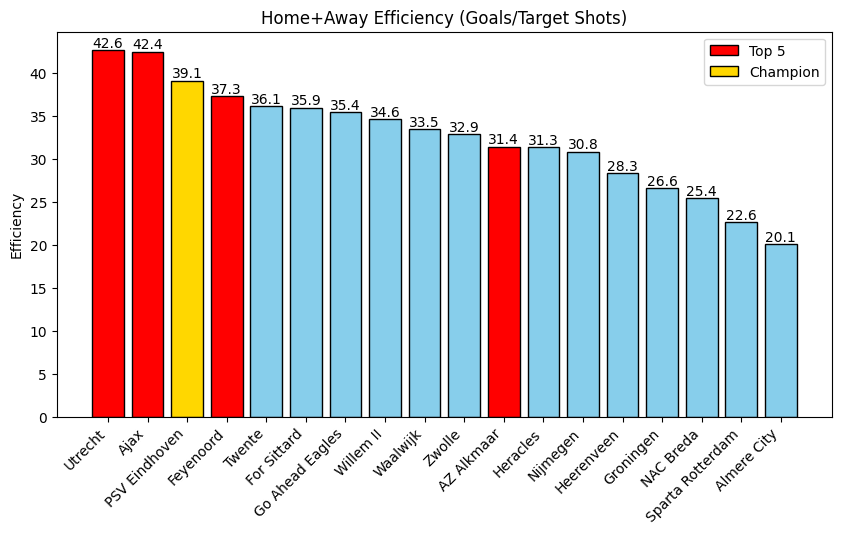

In [152]:
### Total Efficiency 
total_efficiency_list = []
for item in away_team_dictionary:
    away = away_team_dictionary[item]
    home = home_team_dictionary[item]
    total = home+away #merging everything 
    total_efficiency_list.append({"Team": item, "Efficiency": np.mean(total)})



total_efficiency_dataframe = pd.DataFrame(total_efficiency_list)
sorted_df = total_efficiency_dataframe.sort_values(by='Efficiency', ascending=False)
fig, ax = plt.subplots(figsize=(10, 5))

#Setting up the colors
colors = ['red','red','gold','red','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','red','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue']

bar_container = ax.bar(sorted_df['Team'], sorted_df['Efficiency']*100, color=colors,edgecolor='black')
ax.set(ylabel='Efficiency', title='Home+Away Efficiency (Goals/Target Shots)')
ax.bar_label(bar_container, fmt='{:,.1f}')
ax.set_xticks(range(len(sorted_df['Team'])),labels=sorted_df['Team'],rotation=45, ha='right')
#ax.grid(True)

legend_elements = [
    Patch(facecolor='red', edgecolor='black', label='Top 5'),
    Patch(facecolor='gold', edgecolor='black', label='Champion')
]

ax.legend(handles=legend_elements)


### Most Goals Scored (Best Attack) and Least Goals Suffered (Best Defense)


In [137]:
total_team_goals_scored_dictionary = {}
total_team_goals_suffered_dictionary = {}
for item in eredivisie_2025_shot_efficiency_dataframe['HomeTeam'].unique():
    total_team_goals_scored_dictionary[item] = []
    total_team_goals_suffered_dictionary[item] = []

In [138]:
for i in range(len(eredivisie_2025_shot_efficiency_dataframe)):

    home_goals = eredivisie_2025_shot_efficiency_dataframe.iloc[i,3]
    away_goals = eredivisie_2025_shot_efficiency_dataframe.iloc[i,4]


    if not(np.isnan(home_goals)):
        total_team_goals_scored_dictionary[eredivisie_2025_shot_efficiency_dataframe.iloc[i,0]].append(home_goals)
        total_team_goals_suffered_dictionary[eredivisie_2025_shot_efficiency_dataframe.iloc[i,1]].append(home_goals)


    if not(np.isnan(away_goals)):
        total_team_goals_scored_dictionary[eredivisie_2025_shot_efficiency_dataframe.iloc[i,1]].append(away_goals)
        total_team_goals_suffered_dictionary[eredivisie_2025_shot_efficiency_dataframe.iloc[i,0]].append(away_goals)

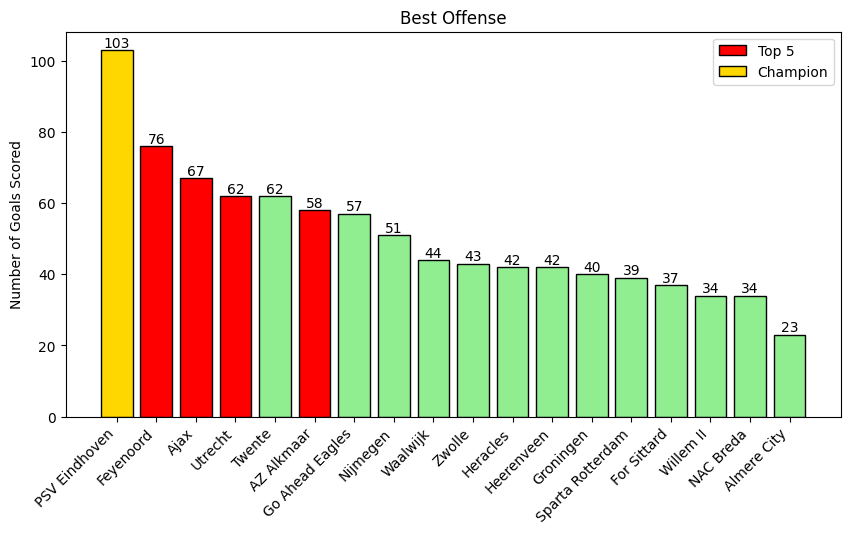

In [146]:
total_goals_scored_list = []
for item in total_team_goals_scored_dictionary:
    total_goals_scored_list.append({"Team": item, "Efficiency": np.sum(total_team_goals_scored_dictionary[item])})


total_goals_scored_dataframe = pd.DataFrame(total_goals_scored_list)
sorted_df = total_goals_scored_dataframe.sort_values(by='Efficiency', ascending=False)
fig, ax = plt.subplots(figsize=(10, 5))

#Setting up the colors
colors = ['Gold','red','red','red','lightgreen','red','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen']

bar_container = ax.bar(sorted_df['Team'], sorted_df['Efficiency'], color=colors,edgecolor='black')
ax.set(ylabel='Number of Goals Scored', title='Best Offense')
ax.bar_label(bar_container, fmt='{:,.0f}')
ax.set_xticks(range(len(sorted_df['Team'])),labels=sorted_df['Team'],rotation=45, ha='right')
#ax.grid(True)

legend_elements = [
    Patch(facecolor='red', edgecolor='black', label='Top 5'),
    Patch(facecolor='gold', edgecolor='black', label='Champion')
]

ax.legend(handles=legend_elements)

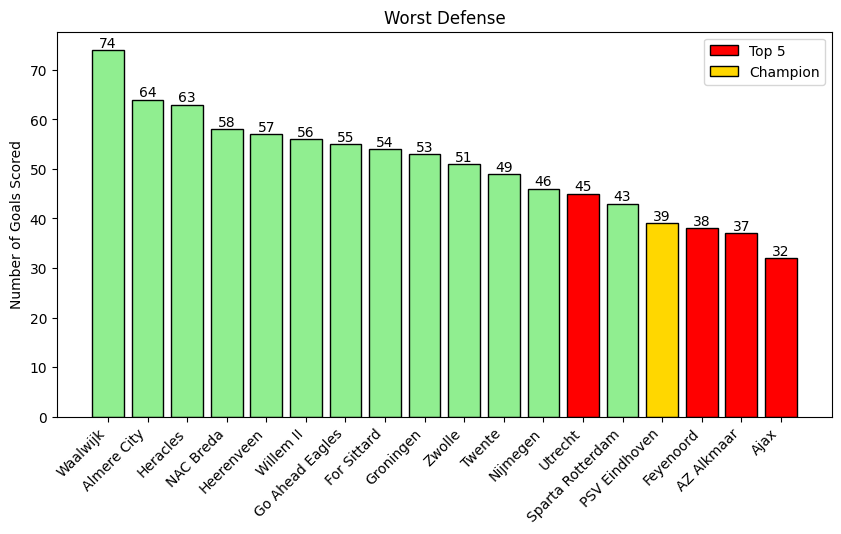

In [156]:
total_goals_suffered_list = []
for item in total_team_goals_scored_dictionary:
    total_goals_suffered_list.append({"Team": item, "Goals_suffered": np.sum(total_team_goals_suffered_dictionary[item])})


total_goals_suffered_dataframe = pd.DataFrame(total_goals_suffered_list)
sorted_df = total_goals_suffered_dataframe.sort_values(by='Goals_suffered', ascending=False)
fig, ax = plt.subplots(figsize=(10, 5))

#Setting up the colors
colors = ['lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','red','lightgreen','gold','red','red','red']

bar_container = ax.bar(sorted_df['Team'], sorted_df['Goals_suffered'], color=colors,edgecolor='black')
ax.set(ylabel='Number of Goals Scored', title='Worst Defense')
ax.bar_label(bar_container, fmt='{:,.0f}')
ax.set_xticks(range(len(sorted_df['Team'])),labels=sorted_df['Team'],rotation=45, ha='right')
#ax.grid(True)

legend_elements = [
    Patch(facecolor='red', edgecolor='black', label='Top 5'),
    Patch(facecolor='gold', edgecolor='black', label='Champion')
]

ax.legend(handles=legend_elements)

### Wins vs efficiency

In [157]:
wins_home_dictionary = {}
wins_away_dictionary = {}

for item in eredivisie_2025_shot_efficiency_dataframe['HomeTeam'].unique():
    wins_home_dictionary[item] = []
    wins_away_dictionary[item] = []

In [158]:
for i in range(len(eredivisie_2025_shot_efficiency_dataframe)):

    result = eredivisie_2025_shot_efficiency_dataframe.iloc[i,2]
    if result == 'A':
        wins_away_dictionary[eredivisie_2025_shot_efficiency_dataframe.iloc[i,1]].append(1)
        
    elif result == 'H':
        wins_home_dictionary[eredivisie_2025_shot_efficiency_dataframe.iloc[i,0]].append(1)


In [176]:
wins_efficiency_home_list = []
wins_efficiency_away_list = []


for item in total_team_goals_scored_dictionary:
    wins_efficiency_home_list.append({"Team": item, "Wins": np.sum(wins_home_dictionary[item]), "Efficiency": np.mean(home_team_dictionary[item])})
    wins_efficiency_away_list.append({"Team": item, "Wins": np.sum(wins_away_dictionary[item]), "Efficiency": np.mean(away_team_dictionary[item])})

wins_efficiency_home_dataframe = pd.DataFrame(wins_efficiency_home_list)
wins_efficiency_away_dataframe = pd.DataFrame(wins_efficiency_away_list)

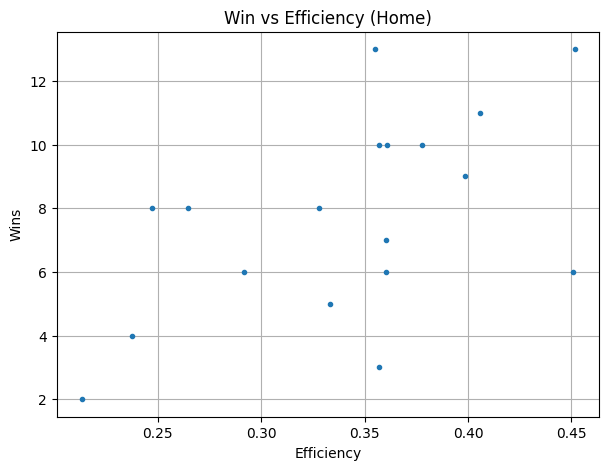

In [171]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.set(ylabel='Wins',xlabel='Efficiency', title='Win vs Efficiency (Home)')
#ax.scatter(x=wins_efficiency_home_dataframe['Efficiency'] ,y=wins_efficiency_home_dataframe['Wins'] )
ax.plot(wins_efficiency_home_dataframe['Efficiency'], wins_efficiency_home_dataframe['Wins'], '.') 
ax.grid(True)
#ax.grid(True)

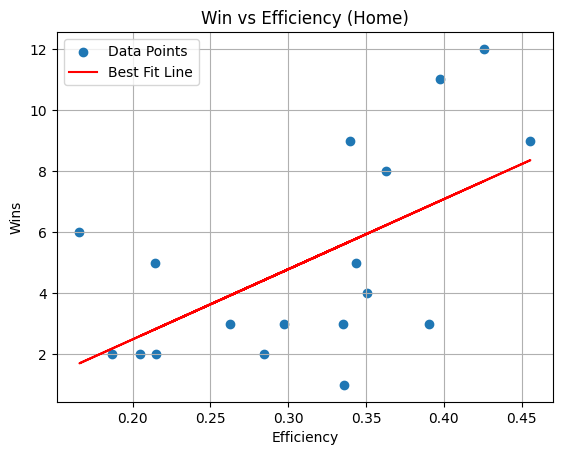

In [177]:
fig, ax = plt.subplots()

# Get your x and y data
x = wins_efficiency_away_dataframe['Efficiency']
y = wins_efficiency_away_dataframe['Wins']

# Scatter plot
ax.scatter(x, y, label='Data Points')

# Fit a linear regression line
coeffs = np.polyfit(x, y, 1)
y_fit = coeffs[0] * x + coeffs[1]
ax.plot(x, y_fit, color='red', label='Best Fit Line')

# Labels and grid
ax.set(xlabel='Efficiency', ylabel='Wins', title='Win vs Efficiency (Home)')
ax.grid(True)
ax.legend()

# Show the plot
plt.show()


### Wins vs Goals